# Milk Quality Prediction

# Import libraries

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read CSV

In [4]:
df= pd.read_csv(r"C:\programing ppt\sample data\milknew.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


# Data Analysis

In [5]:
df.size   # check size of dataset

8472

In [6]:
df.shape        # Check shape of Dataset

(1059, 8)

In [7]:
df.info()   # Check information aboute Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [8]:
df.head(5)     # Display first 5 rows of Dataset

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [9]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
df.isnull().sum()  # Check Missing value in dataset using isnull().sum() function

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

# data preprocessing 

Data preprocessing is a crucial step in the machine learning pipeline. 

It involves cleaning and transforming raw data into a format that can be effectively used by a machine learning model.

# Data  Encoding

In my dataset we have Target variable is grade,
and in grade column we have categorical value then now convert categorical value into numeric form.
this column have orderd from then we use Label encoding.

# Applye Label Encoding

In [11]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

In [12]:
l_enc=df[["Grade"]]

In [13]:
# creating label encoder
le=LabelEncoder()

In [14]:
le.fit_transform(l_enc["Grade"])

array([0, 0, 1, ..., 1, 0, 1])

l_enc['Grade_df_enc']=le.fit_transform(l_enc["Grade"])
l_enc

# Convert Categorical into Numerical 

In [ ]:
# using map function you can create a mapping between the original categorical values and the encoded values. 

In [16]:
df['Grade']=df['Grade'].map({'low':0,'medium':1,'high':2}) # we can also use map function to convert variable categorical into numeric form.
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [17]:
# After converting
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2


# Data Visualization

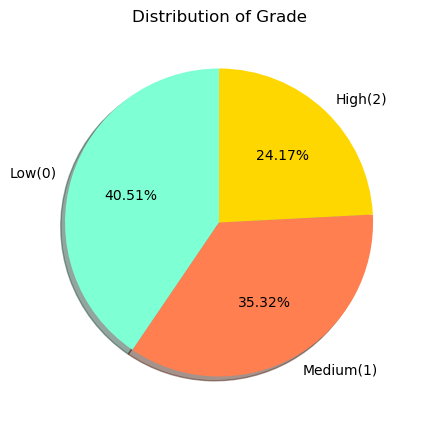

In [18]:
# Plot the pie chart
# Set the size of the figure (width, height)
plt.figure(figsize=(5, 5))
# Create the pie chart
plt.pie(df["Grade"].value_counts(), 
        labels=['Low(0)','Medium(1)','High(2)'], 
        autopct='%.2f%%', 
        startangle=90,
        colors=['aquamarine','coral','gold'], 
        shadow=True)
plt.title('Distribution of Grade')
plt.show()

<AxesSubplot:>

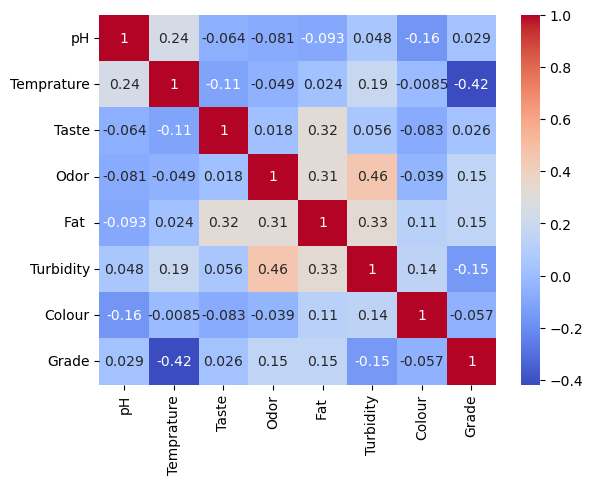

In [19]:
# Create Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Standardization
Standardization can be important for algorithms that are sensitive to the scale of the input features,
such as gradient descent-based algorithms.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Splitting into X, y format

Data split in 80: 20 ratio, and x & y  format 80% for training purpose and 20% for testing purpose.

In [22]:
# Splitting Data
# X represents the input features (all columns except 'Grade')
X=df.drop(['Grade'],axis=1)
# y represents the target variable ('Grade')
y=df['Grade']
print('shape of X', X.shape)
print('shape of y', y.shape)

shape of X (1059, 7)
shape of y (1059,)


In [23]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=51)
print('shape of the X_train= ', X_train.shape)
print('shape of the y_train= ', y_train.shape)
print('shape of the X_test= ', X_test.shape)
print('shape of the y_test= ', y_test.shape)


shape of the X_train=  (847, 7)
shape of the y_train=  (847,)
shape of the X_test=  (212, 7)
shape of the y_test=  (212,)


# implement Standard Scaler

In [24]:
sc = StandardScaler()

In [25]:
sc.fit(X_train)

StandardScaler()

In [26]:
sc.mean_

array([  6.64391972,  44.32349469,   0.54899646,   0.44746163,
         0.67650531,   0.49940968, 251.86068477])

In [27]:
sc.scale_

array([ 1.42007291, 10.31220792,  0.49759356,  0.49723206,  0.46780966,
        0.49999965,  4.25813491])

In [28]:
X_train.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,6.643920,44.323495,0.548996,0.447462,0.676505,0.499410,251.860685
std,1.420912,10.318301,0.497888,0.497526,0.468086,0.500295,4.260651
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [29]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [30]:
X_train_sc = pd.DataFrame(X_train_sc, columns= ['pH','Temprature','Taste','Odor','Fat','Turbidity','Colour'])
X_test_sc = pd.DataFrame(X_test_sc, columns= ['pH','Temprature','Taste','Odor','Fat','Turbidity','Colour'])

In [31]:

X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
666,6.5,37,0,0,0,0,255
446,8.5,70,0,0,0,0,246
380,6.6,38,1,0,1,0,255
407,3.0,40,1,0,0,0,255
882,4.7,38,1,0,1,0,255
...,...,...,...,...,...,...,...
933,6.5,37,0,0,0,0,255
528,6.7,41,1,0,0,0,247
485,6.6,38,0,0,1,0,255
57,8.6,55,0,1,1,1,255


In [32]:
X_train_sc.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,-0.101347,-0.710177,-1.103303,-0.899905,-1.446112,-0.99882,0.737251
1,1.307032,2.489913,-1.103303,-0.899905,-1.446112,-0.99882,-1.376350
2,-0.030928,-0.613205,0.906369,-0.899905,0.691509,-0.99882,0.737251
3,-2.566009,-0.419260,0.906369,-0.899905,-1.446112,-0.99882,0.737251
4,-1.368887,-0.613205,0.906369,-0.899905,0.691509,-0.99882,0.737251


In [33]:
X_train_sc.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02,8.470000e+02
mean,1.369756e-16,-1.617328e-16,-1.310771e-16,9.909429e-17,-1.142992e-16,5.243084e-19,1.718945e-15
std,1.000591e+00,1.000591e+00,1.000591e+00,1.000591e+00,1.000591e+00,1.000591e+00,1.000591e+00
min,-2.566009e+00,-1.001095e+00,-1.103303e+00,-8.999050e-01,-1.446112e+00,-9.988201e-01,-2.785418e+00
25%,-1.013467e-01,-6.132047e-01,-1.103303e+00,-8.999050e-01,-1.446112e+00,-9.988201e-01,-4.369718e-01
50%,3.949113e-02,-3.222874e-01,9.063693e-01,-8.999050e-01,6.915092e-01,-9.988201e-01,7.372512e-01
75%,1.099100e-01,6.560237e-02,9.063693e-01,1.111228e+00,6.915092e-01,1.001181e+00,7.372512e-01
max,2.011221e+00,4.429362e+00,9.063693e-01,1.111228e+00,6.915092e-01,1.001181e+00,7.372512e-01


In [34]:
X_train_sc.describe().round(2)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,847.00,847.00,847.00,847.00,847.00,847.0,847.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.0,0.00
std,1.00,1.00,1.00,1.00,1.00,1.0,1.00
min,-2.57,-1.00,-1.10,-0.90,-1.45,-1.0,-2.79
25%,-0.10,-0.61,-1.10,-0.90,-1.45,-1.0,-0.44
50%,0.04,-0.32,0.91,-0.90,0.69,-1.0,0.74
75%,0.11,0.07,0.91,1.11,0.69,1.0,0.74
max,2.01,4.43,0.91,1.11,0.69,1.0,0.74


# Implement ML Model

#  KNearestNeighbors (KNN ) classification Algorithm.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
knn.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9905660377358491

# Implement Support Vectore Classifier (SVC)

In [38]:
from sklearn.svm import SVC     # from Support vactore machine we import supoort vectore classifier

In [39]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(X_train,y_train)

SVC()

In [40]:
classification_rbf.score(X_test,y_test)

0.5707547169811321

In [38]:
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [42]:
X_train_sc=sc.transform(X_train)


In [43]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [44]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(X_train_sc,y_train)
classification_rbf_2.score(X_test_sc,y_test)

0.9669811320754716

# SVC with kernel linear

In [45]:
classification_linear=SVC(kernel='linear')
classification_linear.fit(X_train_sc,y_train)
classification_linear.score(X_test_sc,y_test)

0.8915094339622641

# RandomForest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

# Implement Confusion Matrix and Accuracy

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [49]:
y_pred=classification_linear.predict(X_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
cm= confusion_matrix(y_test, y_pred)

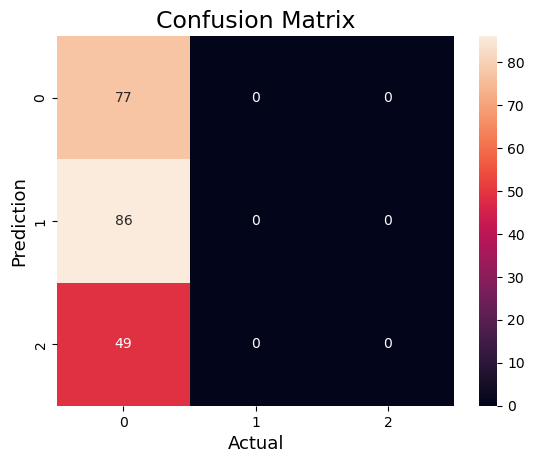

In [51]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


In [52]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.3632075471698113


In [53]:
precision=precision_score(y_test,y_pred,average="macro")
print(precision)

0.1210691823899371


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
recall=recall_score(y_test,y_pred,average="macro")
print(recall)

0.3333333333333333


In [55]:
F1_score=f1_score(y_test,y_pred,average="macro")
print(F1_score)

0.17762399077277968
